Building on the previous Codio activity, please select a dataset that is of interest to you. This could be a dataset provided in this program or one that you have sourced from the Internet. Utilizing the selected dataset, please create a visualization that best describes the data.

Post the following to the discussion board:
- Attach your visualization
- Explain the method you used to create the visualization
- Share what library you used
- Describe the results you found and what they tell you about the dataset you chose

---

The dataset I used is the Fermi-LAT Gamma-ray Burst (GRB) Catalog, which catalogues all of the GRB sources which have been observed by the LAT and/or GBM satellite telescope over a 2 decade span.

I decided to analyze the angular distribution of the sources as they relate to Redshift, which can be considered a proxy for the distance between the source and Earth.

We expect that the angular distribution have a small overdensity at our galactic center (meaning that there are more GRBs coming from (0,0)) however this difference should be somewhat nominal. We expect this because GRBs with a redshift greater than zero are expected to be intergalactic.

I used matplotlib's projection method to create this figure. I then used scatter's cmap and colorbar to color the points by redshift. I used astropy to read in the dataset and numpy for some miscellaneous data preparation.

The results match our expectations! There is a minor overdensity by calculating the galactic center/anticenter numerical ratio (1.08). Meanwhile, the highest-redshift sources are visibly rather isotropic.

Fun note: the highest redshift in this dataset is 4.62, which corresponds to a GRB emitted between 9.5-13 billion years ago (depending on the cosmology you use to calculate it).

In [15]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [16]:

def clean_data(targets):
    # Cleans columns & GRB names
    
    # Remove trailing whitespace
    targets = targets.rename(columns=lambda x: x.strip().lower())
    # Cleans GRB names
    targets['name'] = targets['name'].str.decode("utf-8").replace('\'','').replace(r"^ +| +$", r"", regex=True)[1:]
    return targets

all_candidates = clean_data(Table.read('FullCatalog.fits').to_pandas())

all_candidates.columns

Index(['name', 'gcn_name', 'time', 'trigger_met', 'ra', 'dec', 'lii', 'bii',
       'error_radius', 'redshift',
       ...
       'late_index', 'late_index_error', 'su_tsinput', 'gbm_cat_name',
       'gbm_cat_t05', 'gbm_cat_t90', 'gbm_cat_t90_error', 'gbm_cat_t95',
       'gbm_cat_fluence', 'gbm_cat_fluence_error'],
      dtype='object', length=107)

In [62]:

def generate_mollweide(targets, calculate_isotropy=True):

    fig = plt.figure()
    ax = fig.add_subplot(211, projection='mollweide')
    plt.grid(True)
    #ax2 = fig.add_subplot(212, projection='mollweide')
    #plt.grid(True)
    
    # change the >180s to negative
    modified = targets.copy()
    modified.loc[modified['lii']>180, 'lii'] -= (360)

    fig.set_figwidth(20)
    fig.set_figheight(10)
    
    mapp = ax.scatter(modified['lii']*(np.pi/180), modified['bii']*(np.pi/180), 50,
              c=modified['redshift'], cmap='Reds',edgecolors='lightgray')
    
    ax.set_xlabel('Galactic Latitude')
    ax.set_ylabel('Galactic Longitude')
    
    #if log_hardness is True:
    #    modified['hardness'] = np.log(modified['hardness'])
    #    ax1.set_title('log(Hardness): darker  = harder')
    #else:
    #    ax1.set_title('Hardness: darker  = harder')
    #ax1.scatter(modified['lii']*(np.pi/180), targets['bii']*(np.pi/180), 50, 
    #            c=modified['hardness'], cmap='Greens', edgecolors='lightgray')

    # quick parse-out of the 0 t90s
    #nonzeros = targets[ targets[burst_duration_col]!=0.0 ]
    #modified = modified[ targets[burst_duration_col]!=0.0 ]

    #ax2.set_title('log(1/Burst Duration): darker = shorter')#, rotation=-90, position=(1, .5), ha='left', va='center')
    #ax2.scatter(modified['lii']*(np.pi/180), modified['bii']*(np.pi/180), 50, 
    #            c=np.log10(1/nonzeros[burst_duration_col]), cmap='Greens', edgecolors='lightgray')

    #ax1.set_ylabel('Gal. Longitude')
    #ax2.set_xlabel('Gal. Latitude')

    caption = 'In Gal. Lat/Long coords, the galactic center is at (0,0) and the plane is on the x-axis.'
    
    if calculate_isotropy:
        #### TODO
        center = modified.query('lii > -90 and lii < 90').shape[0]
        anticenter = modified.query('lii > 90 or lii < -90').shape[0]
        caption += '\nThe ratio of the galactic center/anticenter counts is %.2f'%(center/anticenter)
    #    northern = modified.query('bii > 0 and bii < 90').shape[0]
    #    southern = modified.query('bii < 0 and bii > -90').shape[0]
    #    caption += '\nnothern/southern num. ratio of %.2f'%(northern/southern)
    
    plt.figtext(0.6, .45, 
                caption, 
                horizontalalignment='center', fontsize=10)
    
    fig.suptitle('Mollweide Projection of Gamma-Ray Burst sources with Redshift hue')
    
    fig.colorbar(mapp, label = 'Redshift')
    
    return fig



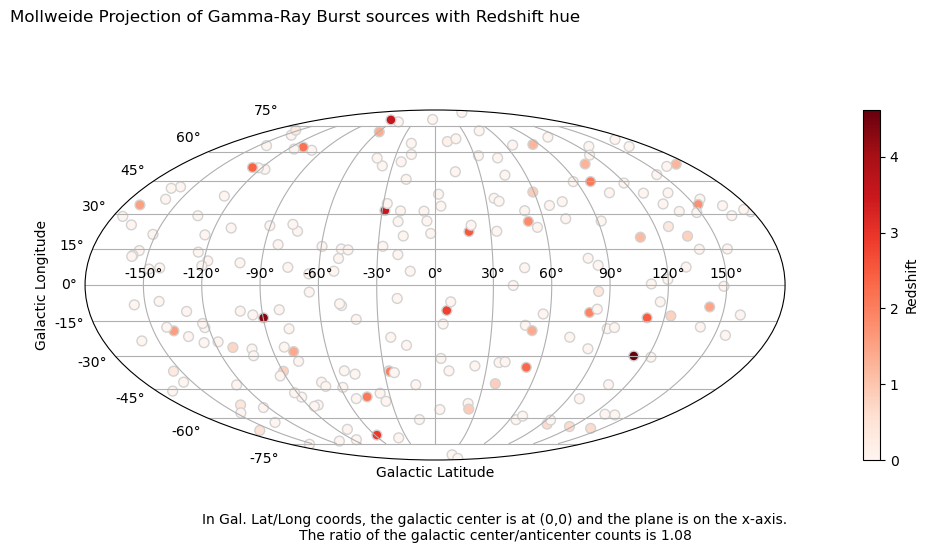

In [63]:
fig = generate_mollweide(all_candidates)

In [64]:
fig.savefig('Mollweide_redshift.png')

In [67]:
all_candidates.sort_values('redshift')[['redshift']]

,redshift
0,0.000
120,0.000
121,0.000
122,0.000
123,0.000
...,...
40,2.938
77,3.510
150,3.570
28,4.350
